![](https://odishabytes.com/wp-content/uploads/2021/03/World-happiness-report.jpg)


O Relatório Mundial da Felicidade (em inglês: World Happiness Report) é uma medição da felicidade publicado pela Rede de Soluções para o Desenvolvimento Sustentável da ONU (SDSN, na sigla em inglês), com base em dados coletados pelo Gallup World Poll. O relatório, cuja primeira edição foi divulgada em 2012 com base em dados de 2011, é feito por especialistas independentes e em 2021-22 foi editado pelo professor Saïd Jan-Emmanuel De Neve da Universidade de Oxford.

No último índice, publicado em março de 2022, a Finlândia aparece como o país mais feliz do mundo, com a CNN destacando: "pelo quinto ano consecutivo, a Finlândia é o país mais feliz do mundo".


[Base de dados](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)



In [2]:
#Importando bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Observando Dados

dados = pd.read_csv('hapiness.csv')

dados.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
#Selecionando colunas 

data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'Logged GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']

In [5]:
dados = dados[data_columns].copy()

In [6]:
#Renomeando as colunas

fel_df = dados.rename(
{ 'Country name': 'Nome_pais',
  'Regional indicator': 'Indicador_regional',
  'Ladder score':'Pontos_felicidade',
  'Standard error of ladder score': 'Erro_padrão',
  'Logged GDP per capita':'PIB',
  'Social support':'Apoio_social',
  'Healthy life expectancy':'Expectativa_vida',
  'Freedom to make life choices': 'Liberdade_escolhas',
  'Explained by: Generosity':'Generosidade',
  'Explained by: Perceptions of corruption': 'Percepcoes_corrupcao'    
}, axis = 1)

In [7]:
#Verificando colunas renomeadas

fel_df.head(5)

,Nome_pais,Indicador_regional,Pontos_felicidade,Erro_padrão,PIB,Apoio_social,Expectativa_vida,Liberdade_escolhas,Generosidade,Percepcoes_corrupcao
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,0.124,0.481
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.208,0.485
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.204,0.413
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.293,0.170
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.302,0.384


In [8]:
#Observando informações

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country name                             149 non-null    object 
 1   Regional indicator                       149 non-null    object 
 2   Ladder score                             149 non-null    float64
 3   Standard error of ladder score           149 non-null    float64
 4   Logged GDP per capita                    149 non-null    float64
 5   Social support                           149 non-null    float64
 6   Healthy life expectancy                  149 non-null    float64
 7   Freedom to make life choices             149 non-null    float64
 8   Explained by: Generosity                 149 non-null    float64
 9   Explained by: Perceptions of corruption  149 non-null    float64
dtypes: float64(8), object(2)
memory usage: 11.8+ KB


In [9]:
#Verifcando dados nulos 

fel_df.isnull().sum()

Nome_pais               0
Indicador_regional      0
Pontos_felicidade       0
Erro_padrão             0
PIB                     0
Apoio_social            0
Expectativa_vida        0
Liberdade_escolhas      0
Generosidade            0
Percepcoes_corrupcao    0
dtype: int64

Text(0, 0.5, 'PIB')

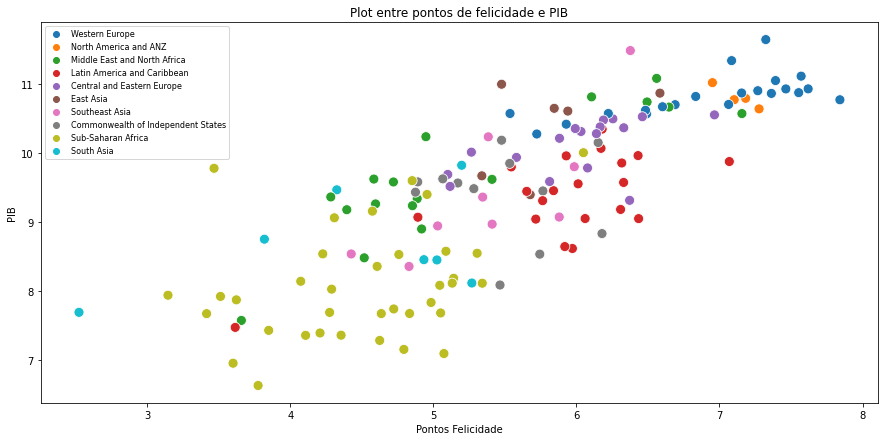

In [10]:
#Plotando pontos de felicidade por PIB

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot entre pontos de felicidade e PIB')
sns.scatterplot(x = fel_df.Pontos_felicidade, y = fel_df.PIB, hue = fel_df.Indicador_regional, s=100);

plt.legend(loc = 'upper left', fontsize = '8')
plt.xlabel('Pontos Felicidade')
plt.ylabel('PIB')
          

In [22]:
# Vamos agrupar e verificar PIB por região

#df.groupby(['Name'], sort = False).sum()

pib_regiao = fel_df.groupby('Indicador_regional')['PIB'].sum()

pib_regiao

Indicador_regional
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: PIB, dtype: float64

Text(0.5, 1.0, 'PIB por região')

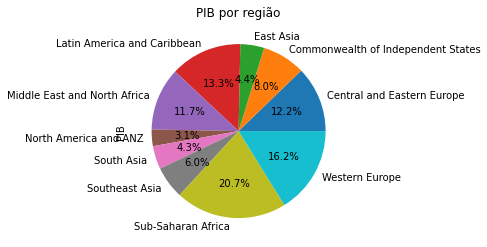

In [26]:
#Observando como estao distribuídos estes dados em um gráfico de pizza


pib_regiao.plot.pie(autopct = '%1.1f%%')
plt.title('PIB por região')

In [13]:
# Pais por região

total_pais = fel_df.groupby('Indicador_regional')[['Nome_pais']].count()

total_pais

,Nome_pais
Indicador_regional,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


C:\Users\CLEITO~1\AppData\Local\Temp/ipykernel_3176/2109402988.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),


<AxesSubplot:>

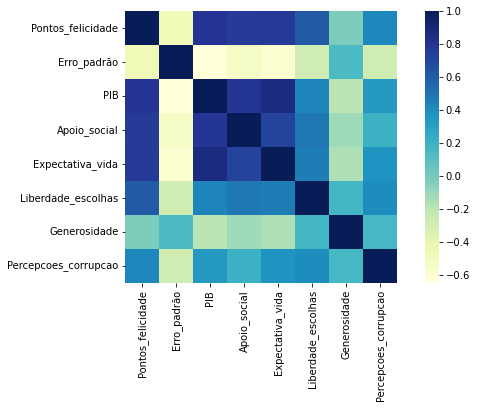

In [14]:
# Vamos observar através de um heatmap que irá nos ajudar em relação as variáveis

cor = fel_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),
            cmap="YlGnBu", square = True, ax = ax)

In [15]:
# Verificndo a média de percepções de corrupção nas regiões

corrup = fel_df.groupby('Indicador_regional')[['Percepcoes_corrupcao']].mean()

corrup



,Percepcoes_corrupcao
Indicador_regional,
Central and Eastern Europe,0.056588
Commonwealth of Independent States,0.136667
East Asia,0.163000
Latin America and Caribbean,0.093650
Middle East and North Africa,0.113000
North America and ANZ,0.312750
South Asia,0.090571
Southeast Asia,0.146667
Sub-Saharan Africa,0.110583


<BarContainer object of 10 artists>

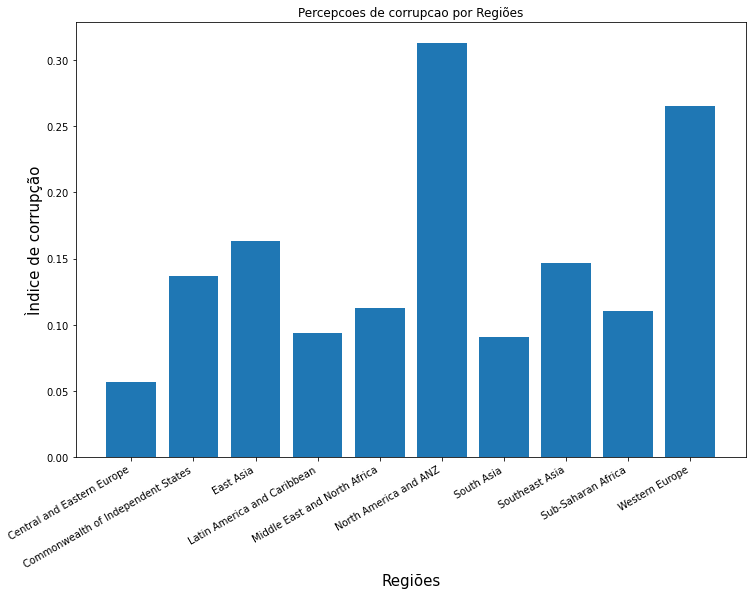

In [16]:
#Observando a corrupção por regiões

plt.rcParams['figure.figsize'] = (12,8)
plt.title('Percepcoes de corrupcao por Regiões')
plt.xlabel ('Regiões', fontsize = 15)
plt.ylabel('Ìndice de corrupção', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corrup.index, corrup.Percepcoes_corrupcao)

In [27]:
#Definindo variáveis para mongagem do gráfico

top_10 = fel_df.head(10)
bottom_10 = fel_df.tail(10)

C:\Users\CLEITO~1\AppData\Local\Temp/ipykernel_3176/830454458.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
C:\Users\CLEITO~1\AppData\Local\Temp/ipykernel_3176/830454458.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')


Text(603.9818181818181, 0.5, 'Expectativa de felicidade')

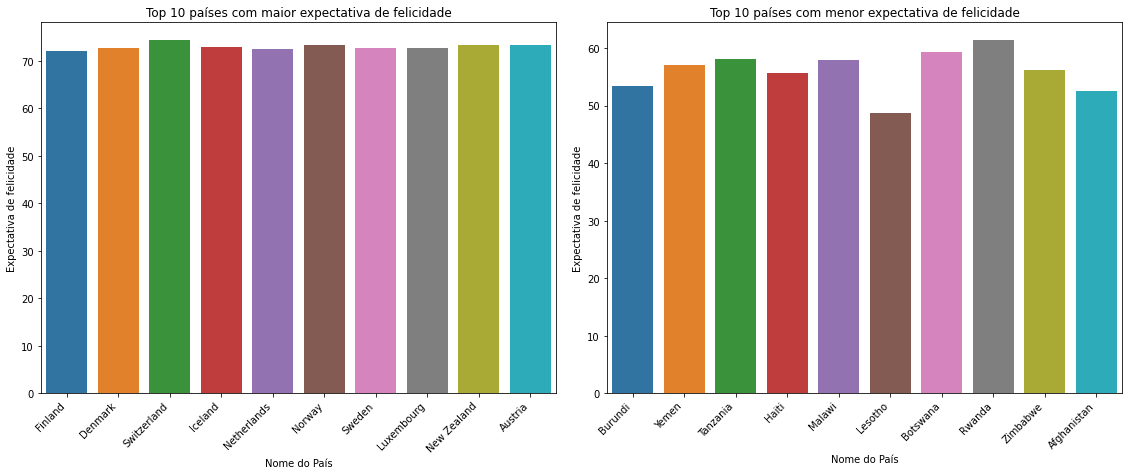

In [28]:
#Plotando o gráfico de acordo com as top cidades

fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.Nome_pais
axes[0].set_title('Top 10 países com maior expectativa de felicidade')
axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x= top_10.Nome_pais, y= top_10.Expectativa_vida, ax = axes[0])
axes[0].set_xlabel('Nome do País')
axes[0].set_ylabel('Expectativa de felicidade')
     
     
xlabels = bottom_10.Nome_pais
axes[1].set_title('Top 10 países com menor expectativa de felicidade')
axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x= bottom_10.Nome_pais, y= bottom_10.Expectativa_vida, ax = axes[1])
axes[1].set_xlabel('Nome do País')
axes[1].set_ylabel('Expectativa de felicidade')     


Text(0, 0.5, ' Corrupção')

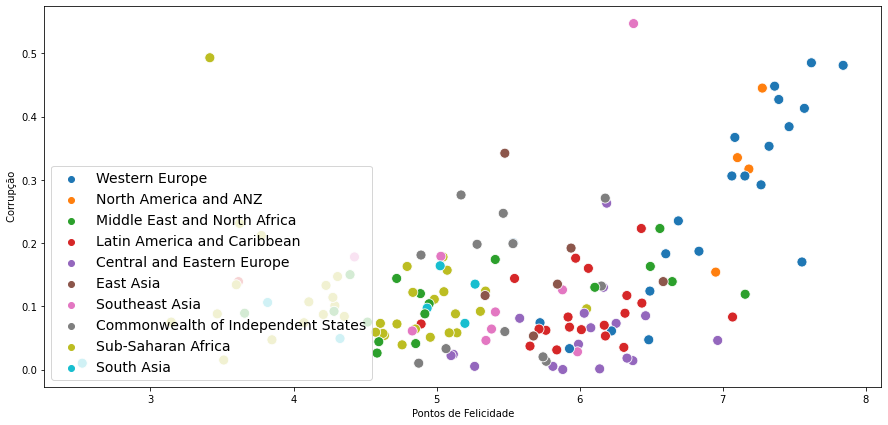

In [31]:
#Neste plot vamos observar por regiões corrupção x pontuação da felicidade

plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = fel_df.Pontos_felicidade, y = fel_df.Percepcoes_corrupcao, hue = fel_df.Indicador_regional, s = 100)
plt.legend(loc = 'lower left', fontsize = '14')
plt.xlabel( 'Pontos de Felicidade')
plt.ylabel(' Corrupção')

In [20]:
fel_df.head(1)

,Nome_pais,Indicador_regional,Pontos_felicidade,Erro_padrão,PIB,Apoio_social,Expectativa_vida,Liberdade_escolhas,Generosidade,Percepcoes_corrupcao
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,0.124,0.481


<BarContainer object of 10 artists>

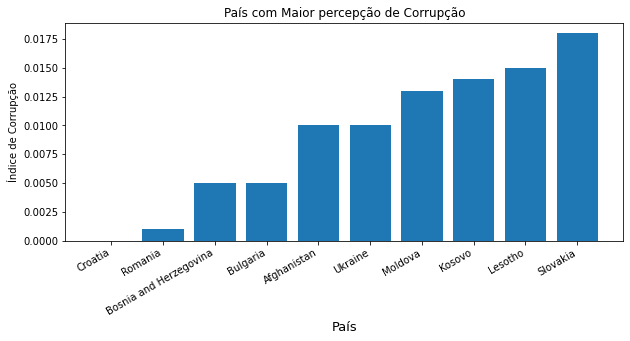

In [21]:
# Vamos pegar os países com maior percepção de corrupção  

pais = fel_df.sort_values(by = 'Percepcoes_corrupcao').head(10)
plt.rcParams['figure.figsize'] = (10, 4)
plt.title('País com Maior percepção de Corrupção')
plt.xlabel('País', fontsize = 13)
plt.ylabel('Índice de Corrupção', fontsize = 10)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(pais.Nome_pais, pais.Percepcoes_corrupcao)